# Understanding Descriptive Statistics

Import the necessary libraries here:

In [27]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [28]:
# your code here
def roll_dice():
    dice_rolls =[]
    for i in range(10):
        dice_rolls.append(random.randint(1,6))
    dice_df = pd.DataFrame({'Result': dice_rolls})
    return dice_df


In [29]:
dice_results = roll_dice()
print(dice_results)

   Result
0       2
1       6
2       1
3       2
4       5
5       5
6       1
7       3
8       5
9       6


#### 2.- Plot the results sorted by value.

,Result
1,6
9,6
4,5
5,5
8,5
7,3
0,2
3,2
2,1
6,1


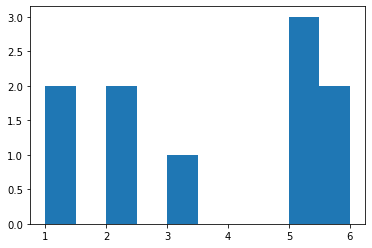

In [30]:
d_sorted = dice_results.sort_values(by="Result", ascending=False)
display(d_sorted)

plt.hist(d_sorted)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [31]:
# your code here
dice_array = d_sorted['Result'].value_counts()

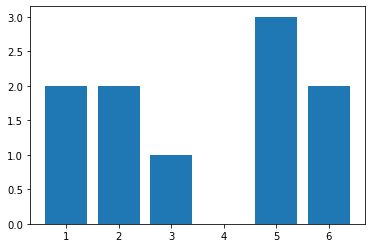

In [32]:
plt.bar(dice_array.index, dice_array.values)
plt.show()

In [33]:
"""
your comments here
maybe I did something wrong, because the graphs, 
even being a histogram and a bar, show the same values.
"""

'\nyour comments here\nmaybe I did something wrong, because the graphs, \neven being a histogram and a bar, show the same values.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [34]:
# your code here
def mean_(columns):
    mean = (np.sum(columns))/len(columns)
    return mean

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [35]:
# your code here
d_sorted['Result'].value_counts()



5    3
6    2
2    2
1    2
3    1
Name: Result, dtype: int64

In [36]:
mean_(d_sorted["Result"])

3.6

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [37]:
# your code here
def median_(columns):
    values = [x for x in d_sorted['Result'] if pd.notna(x)]
    sorted_values = sorted(values)
    n = len(sorted_values)
    if n % 2 == 1:
        return sorted_values[n // 2]
    else:
        return (sorted_values[n // 2 - 1] + sorted_values[n // 2]) / 2


In [38]:
d_sorted['Result'].median()

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [39]:
# your code here
def four_quartiles(d_sorted):
    d = sorted(d_sorted)
    i = len(d)//2 #floor division (for odd length)
    if len(d) % 2 == 0:
        median = (d[i] + d[i+1]) / 2
    else:
        median = d[i]
    j = len(d)//4
    q1 = d[j]
    q3 = d[-j] #q3 = sorted_data[i+j] #not working
    q4 = d[-1] 
    return q1, median, q3, q4

four_quartiles(d_sorted['Result'])

TypeError: 'DataFrame' object is not callable

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [ ]:
# your code here
data = pd.read_csv('roll_the_dice_hundred.csv')


In [ ]:
sorted = data.sort_values(by='value', ascending=False)
sorted

,Unnamed: 0,roll,value
99,99,99,6
36,36,36,6
23,23,23,6
24,24,24,6
90,90,90,6
...,...,...,...
89,89,89,1
47,47,47,1
73,73,73,1
56,56,56,1


In [ ]:
c_data = sorted['value'].value_counts()
c_data

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

(array([12.,  0., 17.,  0., 14.,  0., 22.,  0., 12., 23.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

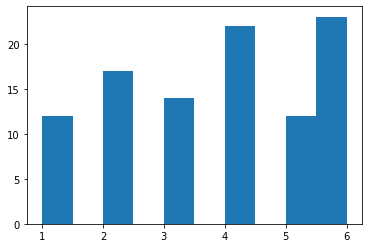

In [ ]:
plt.hist(sorted['value'])

In [ ]:
"""
your comments here
On 100 throws, the values are not approximately but probably with a higher sample this average tends to approximate
to conclude it is a fair dice-rolling.
"""

'\nyour comments here\nOn 100 throws, the values are not approximately but probably with a higher sample this average tends to approximate\nto conclude it is a fair dice-rolling.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [ ]:
# your code here
m = mean_(data)

In [ ]:
#check[
data.mean()

Unnamed: 0    49.50
roll          49.50
value          3.74
dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [ ]:
# your code here
c_data = data['value'].value_counts()
c_data

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12.,  0., 17.,  0., 14.,  0., 22.,  0., 12., 23.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

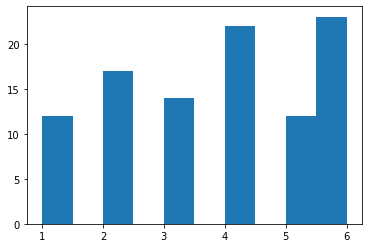

In [ ]:
# your code here
plt.hist(sorted['value'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

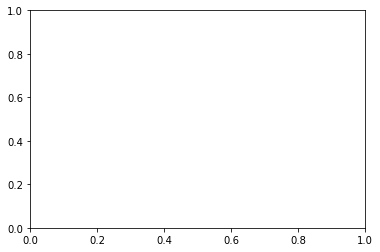

In [ ]:
#My try to connect the mean into the graphic, but it didn't work.
plt.axvline(m, color='r', linestyle='--')
plt.show()

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [ ]:
# your code here
datat = pd.read_csv('roll_the_dice_thousand.csv')

(array([175.,   0., 167.,   0., 175.,   0., 168.,   0., 149., 166.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

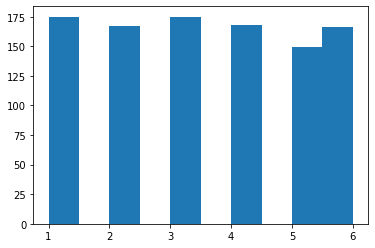

In [ ]:
datat
#hist, bins = np.histogram(datat, bins=range(1, 7))
#plt.bar(bins[:-1], hist, width=1)
#plt.show()
plt.hist(datat['value'])

In [ ]:
"""
your comments here
The results are approximating to the average because we have a higher sample, 
that reinforce the idea of a fair rolling dice
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [ ]:
# your code here
age_1 = pd.read_csv('ages_population.csv')
age_1.value_counts()

In [ ]:
age_1.columns

Index(['observation'], dtype='object')

(array([  9.,  14.,  53.,  61., 102., 156., 153., 195., 107.,  64.,  54.,
         17.,  13.,   1.,   1.]),
 array([ 1. ,  6.4, 11.8, 17.2, 22.6, 28. , 33.4, 38.8, 44.2, 49.6, 55. ,
        60.4, 65.8, 71.2, 76.6, 82. ]),
 <BarContainer object of 15 artists>)

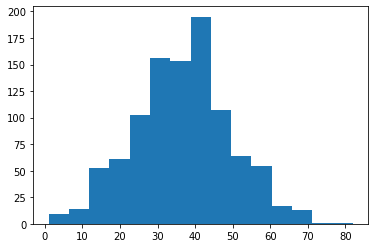

In [ ]:
plt.hist(age_1['observation'], bins=15)

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [ ]:
# your code here
print(age_1.mean())
print(age_1['observation'].std(ddof=1))

observation    36.56
dtype: float64
12.816499625976762


In [ ]:
"""
your comments here
The mean the exact point of the distribuition while this std show that the sample is well distributed around the mean.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [ ]:
# your code here
age_2 = pd.read_csv('ages_population2.csv')
age_2.value_counts()

observation
28.0           139
27.0           125
26.0           120
29.0           115
25.0            98
30.0            90
24.0            78
31.0            61
23.0            41
22.0            35
32.0            31
33.0            22
21.0            17
20.0            13
34.0             7
35.0             3
19.0             3
36.0             2
dtype: int64

(array([ 16.,  17.,  35.,  41.,  78.,  98., 120., 264., 115.,  90.,  61.,
         31.,  22.,   7.,   5.]),
 array([19.        , 20.13333333, 21.26666667, 22.4       , 23.53333333,
        24.66666667, 25.8       , 26.93333333, 28.06666667, 29.2       ,
        30.33333333, 31.46666667, 32.6       , 33.73333333, 34.86666667,
        36.        ]),
 <BarContainer object of 15 artists>)

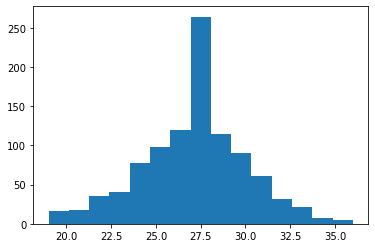

In [ ]:
plt.hist(age_2['observation'], bins=15)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
Yes, the first is more distribuited around the mean and the second is more concentrated.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
# your code here
print(age_2.mean())
print(age_2['observation'].std(ddof=1))

observation    27.155
dtype: float64
2.969813932689186


In [ ]:
"""
your comments here
The second one is more concentraded near the mean, signaling homogeneity.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [42]:
# your code here
age_3 = pd.read_csv('ages_population3.csv')
age_3.value_counts()

observation
32.0           37
37.0           31
35.0           31
39.0           29
36.0           26
               ..
8.0             1
7.0             1
5.0             1
76.0            1
1.0             1
Length: 75, dtype: int64

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [43]:
# your code here
print(age_3.mean())
print(age_3['observation'].std(ddof=1))

observation    41.989
dtype: float64
16.144705959865934


(array([  6.,   7.,  28.,  56.,  73., 107., 131., 131.,  99.,  93.,  63.,
         34.,  61.,  86.,  25.]),
 array([ 1.        ,  6.06666667, 11.13333333, 16.2       , 21.26666667,
        26.33333333, 31.4       , 36.46666667, 41.53333333, 46.6       ,
        51.66666667, 56.73333333, 61.8       , 66.86666667, 71.93333333,
        77.        ]),
 <BarContainer object of 15 artists>)

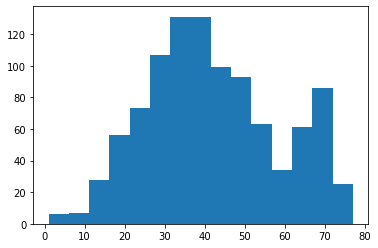

In [44]:
plt.hist(age_3, bins=15)

In [45]:
"""
your comments here
The std is more disperse from the mean signaling that the sample is not homogeneous.
"""

'\nyour comments here\nThe std is more disperse from the mean signaling that the sample is not homogeneous.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [53]:
# your code here
q1 = np.percentile(age_3, 25)
q2 = np.percentile(age_3, 50)
q3 = np.percentile(age_3, 75)
q4 = np.percentile(age_3, 100)

print("First quartile (Q1):", q1)
print("Second quartile (Q2):", q2)
print("Third quartile (Q3):", q3)
print("Max (Q4):", q4)
print("Mean to compare with median in Q2:", age_3["observation"].mean())

#print(np.median(ages3))
#print(np.mean(ages3["observation"]))

First quartile (Q1): 30.0
Second quartile (Q2): 40.0
Third quartile (Q3): 53.0
Max (Q4): 77.0
Mean to compare with median in Q2: 41.989


In [47]:
"""
your comments here
Almost 2 years of difference between the mean and the median, 
which is explained by the observed concentration of values around 60 years.
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

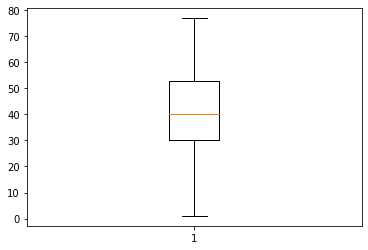

In [58]:
# your code here
plt.boxplot(age_3["observation"])
plt.show()

In [49]:
"""
your comments here

"""

'\nyour comments here\n\nThe different shapes of the two boxplots allow us to better visualize what is happening to the age distribution of the two samples.\nIn Ages, the observations seem to be closer to each other, and the most distant points from the mean are actually taken as outliers.\nHowever, for Ages3 there are more observations with different ages around the median, and the maximum values are not considered outliers.\n\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [50]:
# your code here

In [51]:
"""
your comments here
"""

'\nyour comments here\n'